# Task 7: Sales Summary using Python and SQLite

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Connect to SQLite database (creates it if it doesn't exist)
conn = sqlite3.connect("sales_data.db")

# Create sales table
conn.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [6]:
# Insert sample data (run once)
sample_data = [
    ("Product A", 10, 20.5),
    ("Product B", 5, 15.0),
    ("Product A", 7, 20.5),
    ("Product C", 3, 25.0),
    ("Product B", 2, 15.0),
]
conn.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [7]:
# SQL query to calculate total quantity and revenue
query = "SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product"
df = pd.read_sql_query(query, conn)

In [8]:
# Display query result
print("Sales Summary:")
print(df)

Sales Summary:
     product  total_qty  revenue
0  Product A         34    697.0
1  Product B         14    210.0
2  Product C          6    150.0


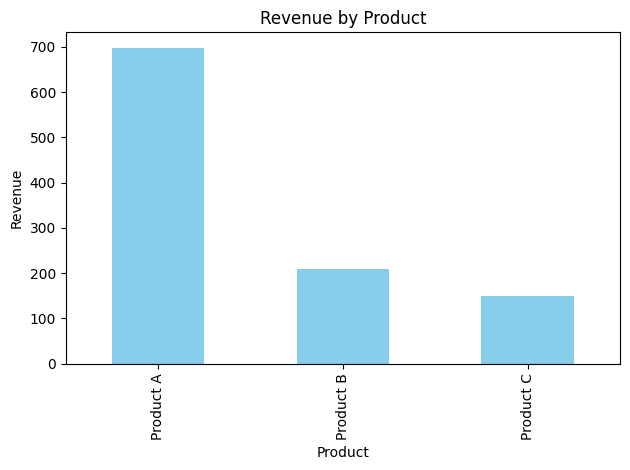

In [9]:
# Plot bar chart for revenue
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save the chart
plt.show()

In [15]:
 import sqlite3
conn = sqlite3.connect("sales_data.db")


In [16]:
 cursor = conn.execute("SELECT SUM(quantity * price) AS total_revenue FROM sales")
for row in cursor:
    print("Total Revenue:", row[0])


Total Revenue: 1057.0


In [18]:
 cursor = conn.execute("""
    SELECT product, SUM(quantity) AS total_quantity
    FROM sales
    GROUP BY product
    ORDER BY total_quantity DESC
    LIMIT 1
""")
for row in cursor:
    print("Top-Selling Product:", row[0], "| Quantity Sold:", row[1])


Top-Selling Product: Product A | Quantity Sold: 34


In [20]:
 cursor = conn.execute("""
    SELECT product, AVG(price) AS avg_price
    FROM sales
    GROUP BY product
""")
for row in cursor:
    print(f"{row[0]}: Average Price = {row[1]}")


Product A: Average Price = 20.5
Product B: Average Price = 15.0
Product C: Average Price = 25.0


In [21]:
cursor = conn.execute("""
    SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
""")
for row in cursor:
    print(f"Product: {row[0]}, Quantity: {row[1]}, Revenue: {row[2]}")


Product: Product A, Quantity: 34, Revenue: 697.0
Product: Product B, Quantity: 14, Revenue: 210.0
Product: Product C, Quantity: 6, Revenue: 150.0


In [22]:
 conn.close()
